In [75]:
# the bare minimum
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import geopandas as gpd

# more advanced
import pyogrio as ogr
from sklearn.cluster import KMeans
from lonboard import Map, PolygonLayer
from lonboard.colormap import apply_categorical_cmap, apply_continuous_cmap 
from palettable.colorbrewer.sequential import PuRd_9
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize

import folium
from folium.plugins import MarkerCluster

import pydeck as pdk
import numpy as np
from shapely.geometry import LineString, MultiLineString, Point, Polygon
import pandas as pd
import requests
import networkx as nx
import osmnx as ox
import h3
import libpysal as lps

# load NYC WIFI hotspots data


In [2]:
pluto_ogrio = ogr.read_dataframe("C://Users/fauxi/OneDrive/Documents/GitHub/cdp-mapping-systems/Data/NYC Wi-Fi Hotspot Locations/geo_export_663c1398-7ec2-4cb6-a417-0912439ca41e.shp")

# List out the columns in the file

# basic exploration


In [3]:
pluto_ogrio.columns

Index(['date_activ', 'time_activ', 'bbl', 'bin', 'boro', 'borocd', 'borocode',
       'boroct2010', 'boroname', 'city', 'coundist', 'ct2010', 'doitt_id',
       'lat', 'location', 'location_t', 'lon', 'name', 'ntacode', 'ntaname',
       'objectid', 'postcode', 'provider', 'remarks', 'sourceid', 'ssid',
       'type', 'x', 'y', 'geometry'],
      dtype='object')

# Explore data types in the file according to the columns

In [4]:
pluto_ogrio.dtypes

date_activ      object
time_activ      object
bbl            float64
bin            float64
boro            object
borocd         float64
borocode       float64
boroct2010     float64
boroname        object
city            object
coundist       float64
ct2010         float64
doitt_id       float64
lat            float64
location        object
location_t      object
lon            float64
name            object
ntacode         object
ntaname         object
objectid       float64
postcode       float64
provider        object
remarks         object
sourceid        object
ssid            object
type            object
x              float64
y              float64
geometry      geometry
dtype: object

## categorical column


# Total count of wifi hotspots in different boroughs

In [5]:
pluto_ogrio.boro.value_counts()

boro
MN    1671
BK     702
QU     530
BX     316
SI     100
Name: count, dtype: int64

# compare boroughs with the wifi providers

In [6]:
grouped_counts = pluto_ogrio.groupby(["boro", "provider"]).size().reset_index(name='counts')

print(grouped_counts)



   boro                 provider  counts
0    BK                ALTICEUSA     117
1    BK                     AT&T       7
2    BK                      BPL      59
3    BK                City Tech      11
4    BK        Downtown Brooklyn     100
5    BK     LinkNYC - Citybridge     257
6    BK                    NYCHA      28
7    BK                 SPECTRUM      43
8    BK         Transit Wireless      80
9    BX                ALTICEUSA     120
10   BX                     AT&T       3
11   BX     LinkNYC - Citybridge     137
12   BX                     NYPL      35
13   BX         Transit Wireless      21
14   MN                     AT&T      12
15   MN                  Chelsea      30
16   MN                Fiberless      30
17   MN                   Harlem     101
18   MN     LinkNYC - Citybridge    1175
19   MN  Manhattan Down Alliance      36
20   MN                     NYPL      43
21   MN                  Partner       2
22   MN                 SPECTRUM      97
23   MN         

# plot the graph og counts of WIFi providers by the Boroughs

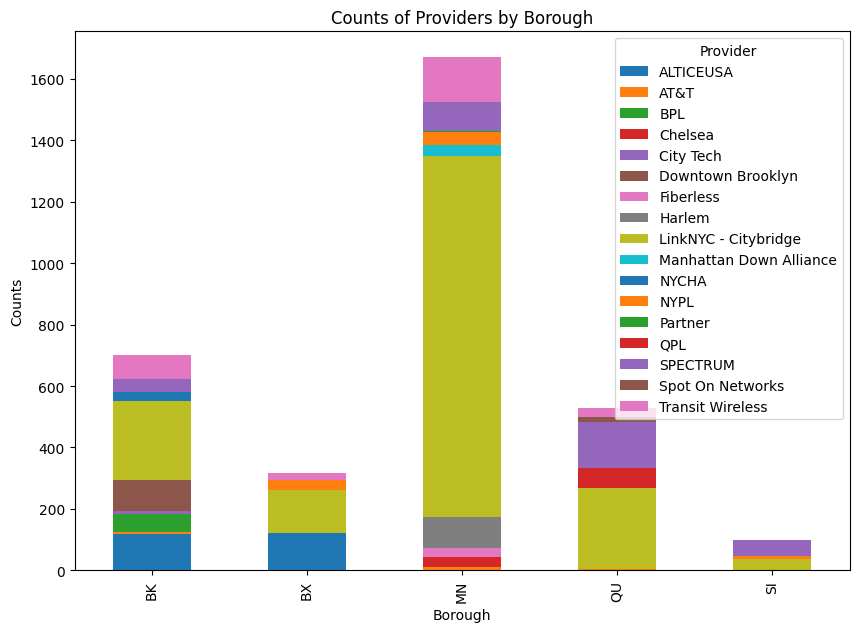

In [7]:
pivot_df = grouped_counts.pivot(index='boro', columns='provider', values='counts')

# Plot the bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.xlabel('Borough')
plt.ylabel('Counts')
plt.title('Counts of Providers by Borough')
plt.legend(title='Provider')
plt.show()

In [15]:
# Assuming pluto_ogrio is already loaded with your data
# Filter data for Manhattan
manhattan_df = pluto_ogrio[pluto_ogrio['boro'] == 'MN']

In [16]:
manhattan_df

,date_activ,time_activ,bbl,bin,boro,borocd,borocode,boroct2010,boroname,city,...,objectid,postcode,provider,remarks,sourceid,ssid,type,x,y,geometry
19,9999/09/09,00:00:00.000,1.017330e+09,0.0,MN,110.0,1.0,1021200.0,Manhattan,New York,...,10406.0,10037.0,Harlem,None,None,Harlem Wi-Fi,Free,1.000736e+06,235883.119819,POINT (-73.94044 40.81411)
21,9999/09/09,00:00:00.000,1.000010e+09,1086432.0,MN,101.0,1.0,1000500.0,Manhattan,New York,...,10341.0,10004.0,Fiberless,Free - up to 5 mbs,Governors Island Trust,Governors Island,Free,9.797576e+05,191664.365081,POINT (-74.01620 40.69275)
22,9999/09/09,00:00:00.000,1.000010e+09,1086432.0,MN,101.0,1.0,1000500.0,Manhattan,New York,...,10342.0,10004.0,Fiberless,Free - up to 5 mbs,Governors Island Trust,Governors Island,Free,9.798740e+05,191653.413659,POINT (-74.01578 40.69272)
23,9999/09/09,00:00:00.000,1.000010e+09,1086431.0,MN,101.0,1.0,1000500.0,Manhattan,New York,...,10343.0,10004.0,Fiberless,Free - up to 5 mbs,Governors Island Trust,Governors Island,Free,9.794439e+05,190199.821094,POINT (-74.01733 40.68873)
24,9999/09/09,00:00:00.000,1.000010e+09,1086416.0,MN,101.0,1.0,1000500.0,Manhattan,New York,...,10344.0,10004.0,Fiberless,Free - up to 5 mbs,Governors Island Trust,Governors Island,Free,9.802179e+05,191584.131645,POINT (-74.01454 40.69253)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3288,2017/10/20,00:00:00.000,1.012640e+09,1034506.0,MN,105.0,1.0,1009600.0,Manhattan,New York,...,12055.0,10020.0,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-012405,LinkNYC Free Wi-Fi,Free,9.902734e+05,215221.171313,POINT (-73.97826 40.75741)
3289,2018/04/10,00:00:00.000,1.013910e+09,1041796.0,MN,108.0,1.0,1013000.0,Manhattan,New York,...,12056.0,10021.0,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-012406,LinkNYC Free Wi-Fi,Free,9.942978e+05,221449.222506,POINT (-73.96372 40.77450)
3290,2017/05/30,00:00:00.000,1.004320e+09,1077557.0,MN,103.0,1.0,1003200.0,Manhattan,New York,...,12057.0,10009.0,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-012424,LinkNYC Free Wi-Fi,Free,9.881015e+05,203888.924949,POINT (-73.98610 40.72630)
3291,2018/05/17,00:00:00.000,1.009120e+09,1082149.0,MN,106.0,1.0,1007000.0,Manhattan,New York,...,12058.0,10016.0,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-012438,LinkNYC Free Wi-Fi,Free,9.905382e+05,209986.738869,POINT (-73.97731 40.74304)


In [17]:
# Group by provider and count occurrences in Manhattan
manhattan_counts = manhattan_df.groupby("provider").size().reset_index(name='counts')

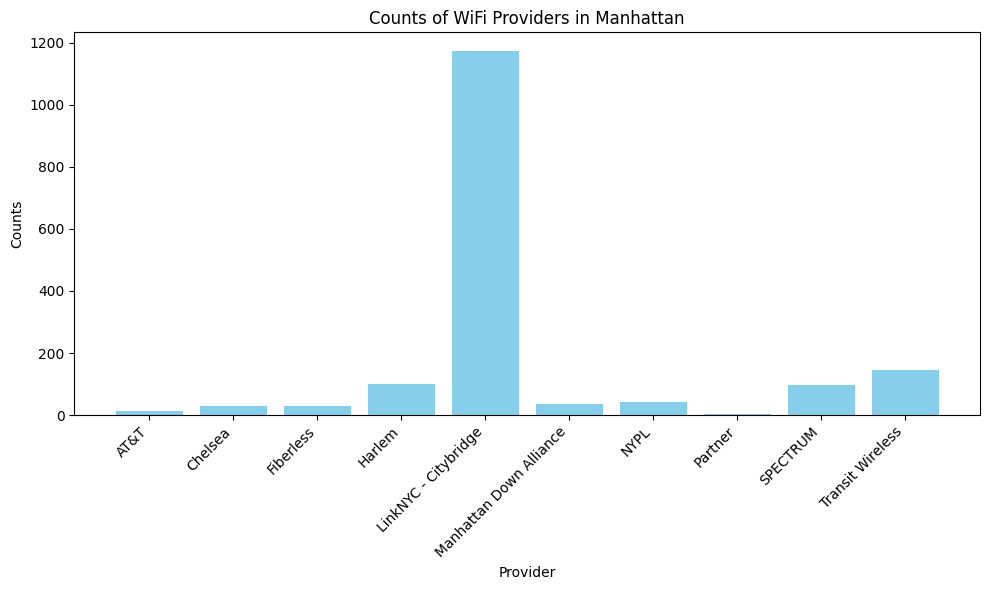

In [18]:
# Plot the bar chart for WiFi providers in Manhattan
plt.figure(figsize=(10, 6))
plt.bar(manhattan_counts['provider'], manhattan_counts['counts'], color='skyblue')
plt.xlabel('Provider')
plt.ylabel('Counts')
plt.title('Counts of WiFi Providers in Manhattan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

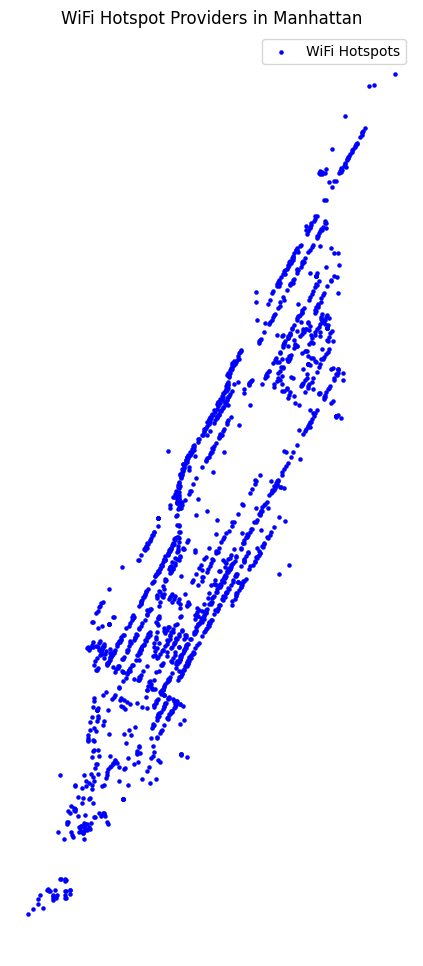

In [20]:
# Plot the WiFi hotspots as points on the map
fig, ax = plt.subplots(figsize=(12, 12))

# Plot Manhattan WiFi hotspots
manhattan_df.plot(ax=ax, marker='o', color='blue', markersize=5, label='WiFi Hotspots')

# Customize the plot
ax.set_title('WiFi Hotspot Providers in Manhattan')
ax.set_axis_off()
plt.legend()

plt.show()

In [24]:
# Initialize a folium map centered around Manhattan
# Approximate central coordinates for Manhattan
m = folium.Map(location=[40.7831, -73.9712], zoom_start=12)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Plot each WiFi hotspot as a point on the map
for idx, row in manhattan_df.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=f"Provider: {row['provider']}",
        icon=folium.Icon(color='blue', icon='wifi', prefix='fa')
    ).add_to(marker_cluster)

# Display the map
m.save("manhattan_wifi_hotspots.html")
m

     provider                  neighbors  \
19     Harlem  [1319, 387, 35, 267, 385]   
21  Fiberless         [2, 10, 12, 4, 14]   
22  Fiberless          [1, 10, 12, 4, 5]   
23  Fiberless   [15, 230, 235, 229, 228]   
24  Fiberless          [12, 10, 2, 1, 5]   

                                        line_geometry  
19  MULTILINESTRING ((1000735.748 235883.120, 1000...  
21  MULTILINESTRING ((979757.562 191664.365, 97987...  
22  MULTILINESTRING ((979874.031 191653.414, 97975...  
23  MULTILINESTRING ((979443.911 190199.821, 97954...  
24  MULTILINESTRING ((980217.885 191584.132, 98015...  


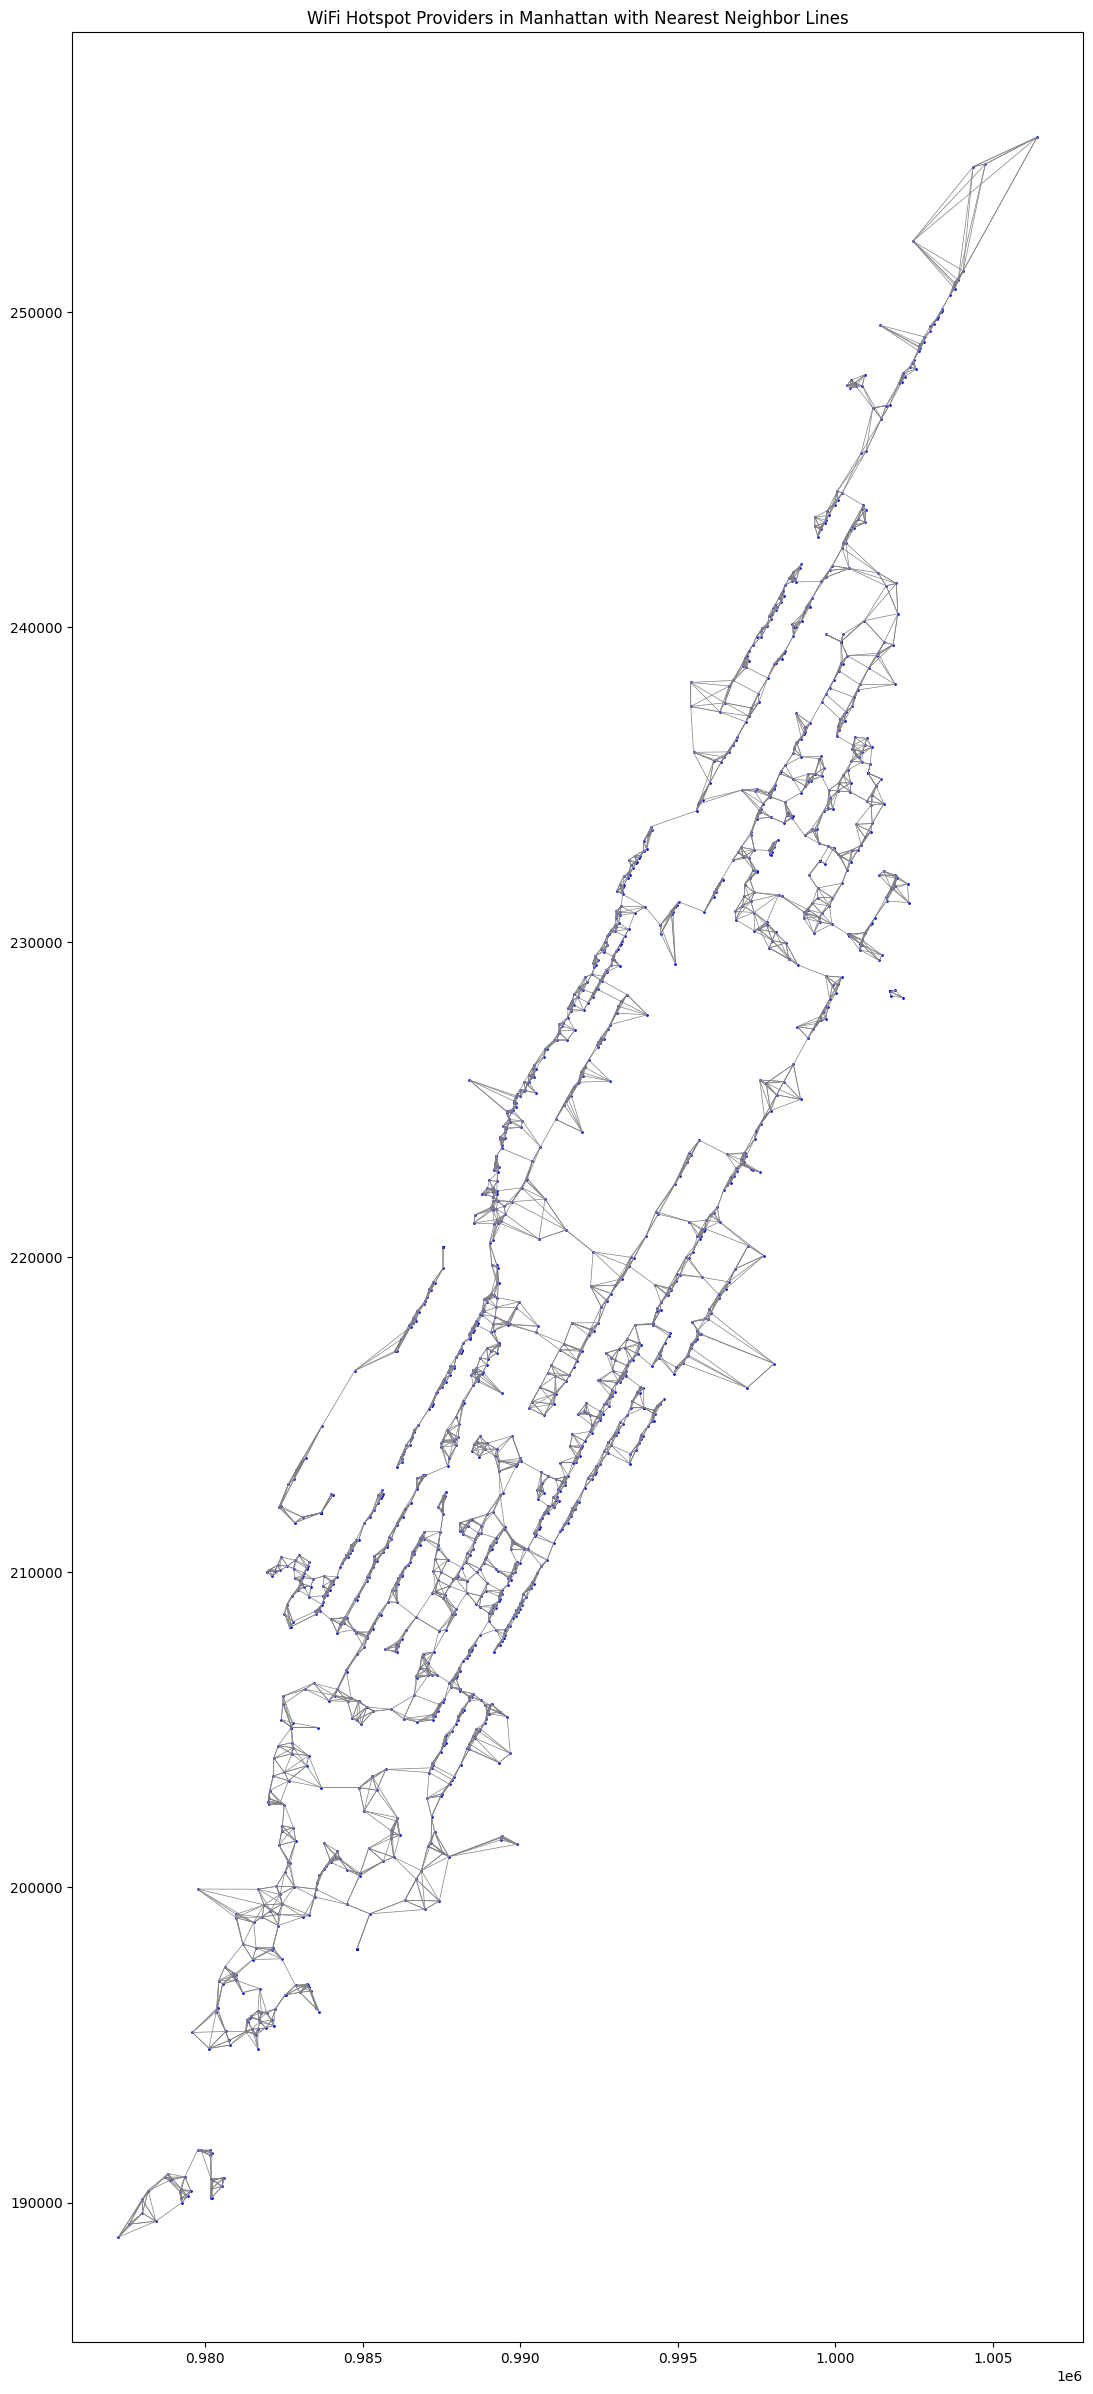

In [30]:
#Extract coordinates of each point
coords = np.array(list(manhattan_df.geometry.apply(lambda geom: (geom.x, geom.y))))

# Calculate pairwise distances using numpy
dist_matrix = np.linalg.norm(coords[:, np.newaxis] - coords, axis=2)

# Find the indices of the five nearest neighbors for each point
nearest_indices = np.argsort(dist_matrix, axis=1)[:, 1:6]

# Function to create lines to the nearest neighbors
def create_lines(row):
    lines = []
    point = row.geometry
    for neighbor_idx in row.neighbors:
        neighbor_point = manhattan_df.iloc[neighbor_idx].geometry
        line = LineString([point, neighbor_point])
        lines.append(line)
    return MultiLineString(lines)

# Add the nearest neighbors to the original GeoDataFrame
manhattan_df['neighbors'] = nearest_indices.tolist()

# Create line geometries for each point
manhattan_df['line_geometry'] = manhattan_df.apply(create_lines, axis=1)

# View the first few rows with lines
print(manhattan_df[['provider', 'neighbors', 'line_geometry']].head())

# Plot the lines and points
base = manhattan_df.plot(marker='o', color='blue', markersize=1, figsize=(30, 30))
manhattan_df.set_geometry('line_geometry').plot(ax=base, color='grey', linewidth=0.5)
plt.title('WiFi Hotspot Providers in Manhattan with Nearest Neighbor Lines')
plt.show()

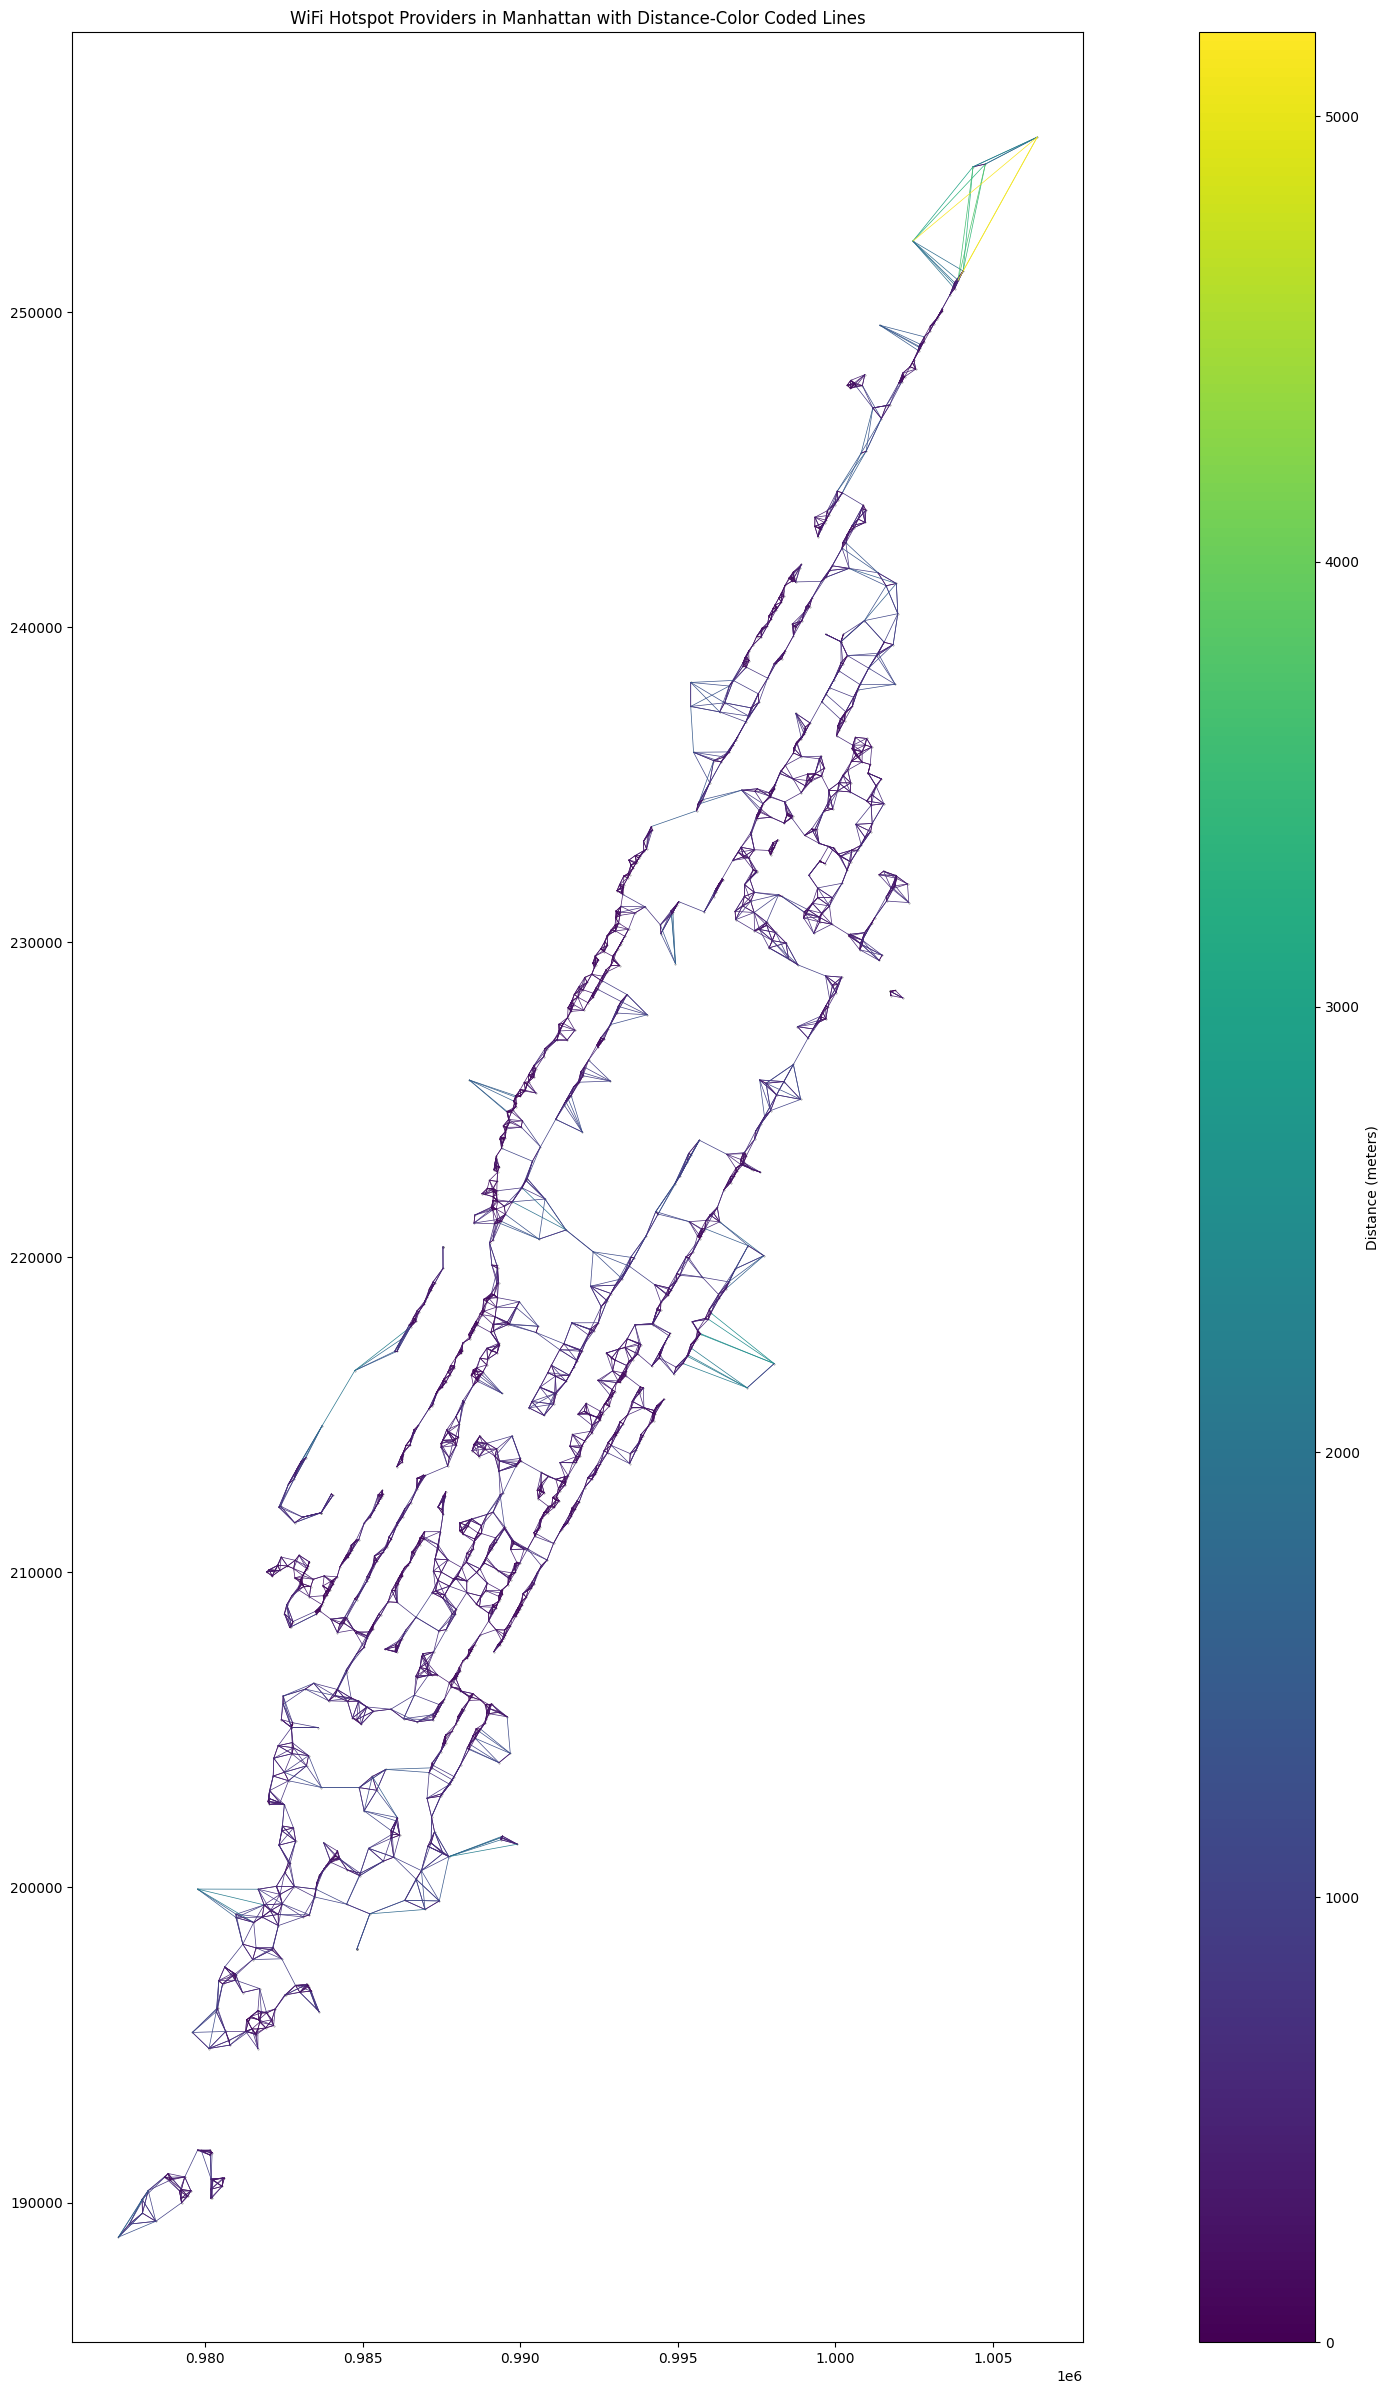

In [54]:
# Flatten the distances list for color mapping
all_distances = [dist for distances in manhattan_df['line_distances'] for dist in distances]

# Normalize the distances for color mapping
norm = Normalize(vmin=min(all_distances), vmax=max(all_distances))
cmap = plt.get_cmap('viridis')  # Access the colormap using plt.get_cmap

# Plot the lines and points with color-coded lines
fig, ax = plt.subplots(figsize=(30, 30))
manhattan_df.plot(ax=ax, marker='o', color='grey', markersize=0.1)

# Plot lines with colors based on distances
for idx, row in manhattan_df.iterrows():
    for line, distance in zip(row['line_geometry'].geoms, row['line_distances']):
        color = cmap(norm(distance))
        x, y = line.xy
        ax.plot(x, y, color=color, linewidth=0.5)

plt.title('WiFi Hotspot Providers in Manhattan with Distance-Color Coded Lines')

# Create a color bar as a legend
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='vertical')
cbar.set_label('Distance (meters)')

plt.show()